HW8:Transform chirp signal

$$ 
y(t) =   \left\{
\begin{array}{ll}
      \sin{(t^2)} & 0<t<15 \\
      0 & else \\
\end{array} 
\right.  
$$

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ns=100
ntau=300
dstep=3./ns
sar=np.arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=np.arange(0.,20.,dtaustep)
ystau=np.zeros((ns, ntau),complex)

nt=600
dtstep=20/nt
tar=np.arange(0.,20,dtstep)

def chirp(t):
    if t > 0 and t < 15:
        return np.sin(t**2)
    else:
        return 0
    
def morlet(t,sigma):
    psi=np.sin(2.*np.pi*t)*np.exp(-t*t/2./sigma/sigma)
    return psi

yarr=np.zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=chirp(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./np.sqrt(sar[idexs])*sum(np.conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep
wavelet()

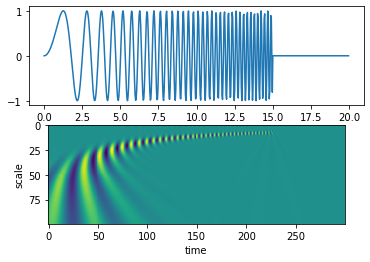

In [49]:

fig = plt.figure()  
ax = fig.add_subplot(2,1,1)

ax.plot(tar,yarr)                        
ax = fig.add_subplot(2,1,2)
ax.imshow(ystau.real)
plt.xlabel('time')
plt.ylabel('scale')
plt.show()
plt.show()  

Compairing to the images found online 

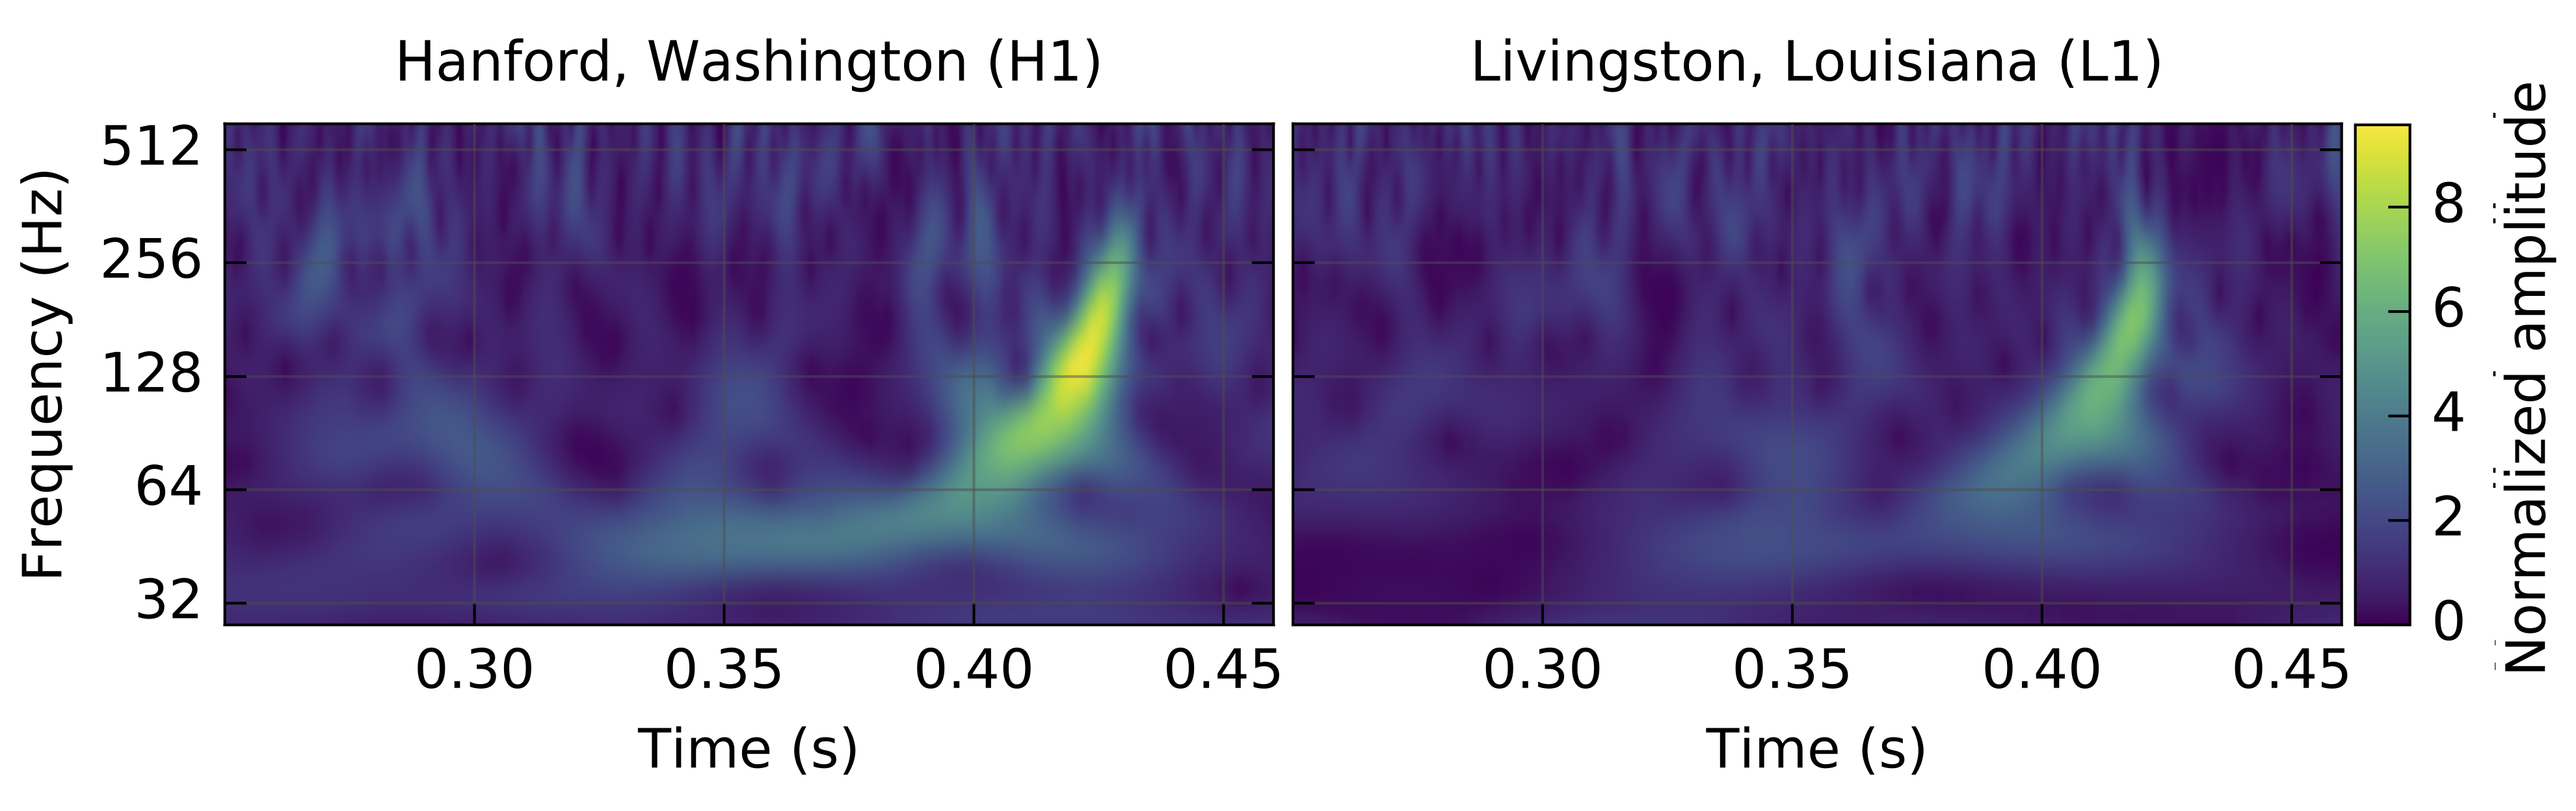

In [23]:
from IPython.display import Image 

Image("ligo_signal.png")


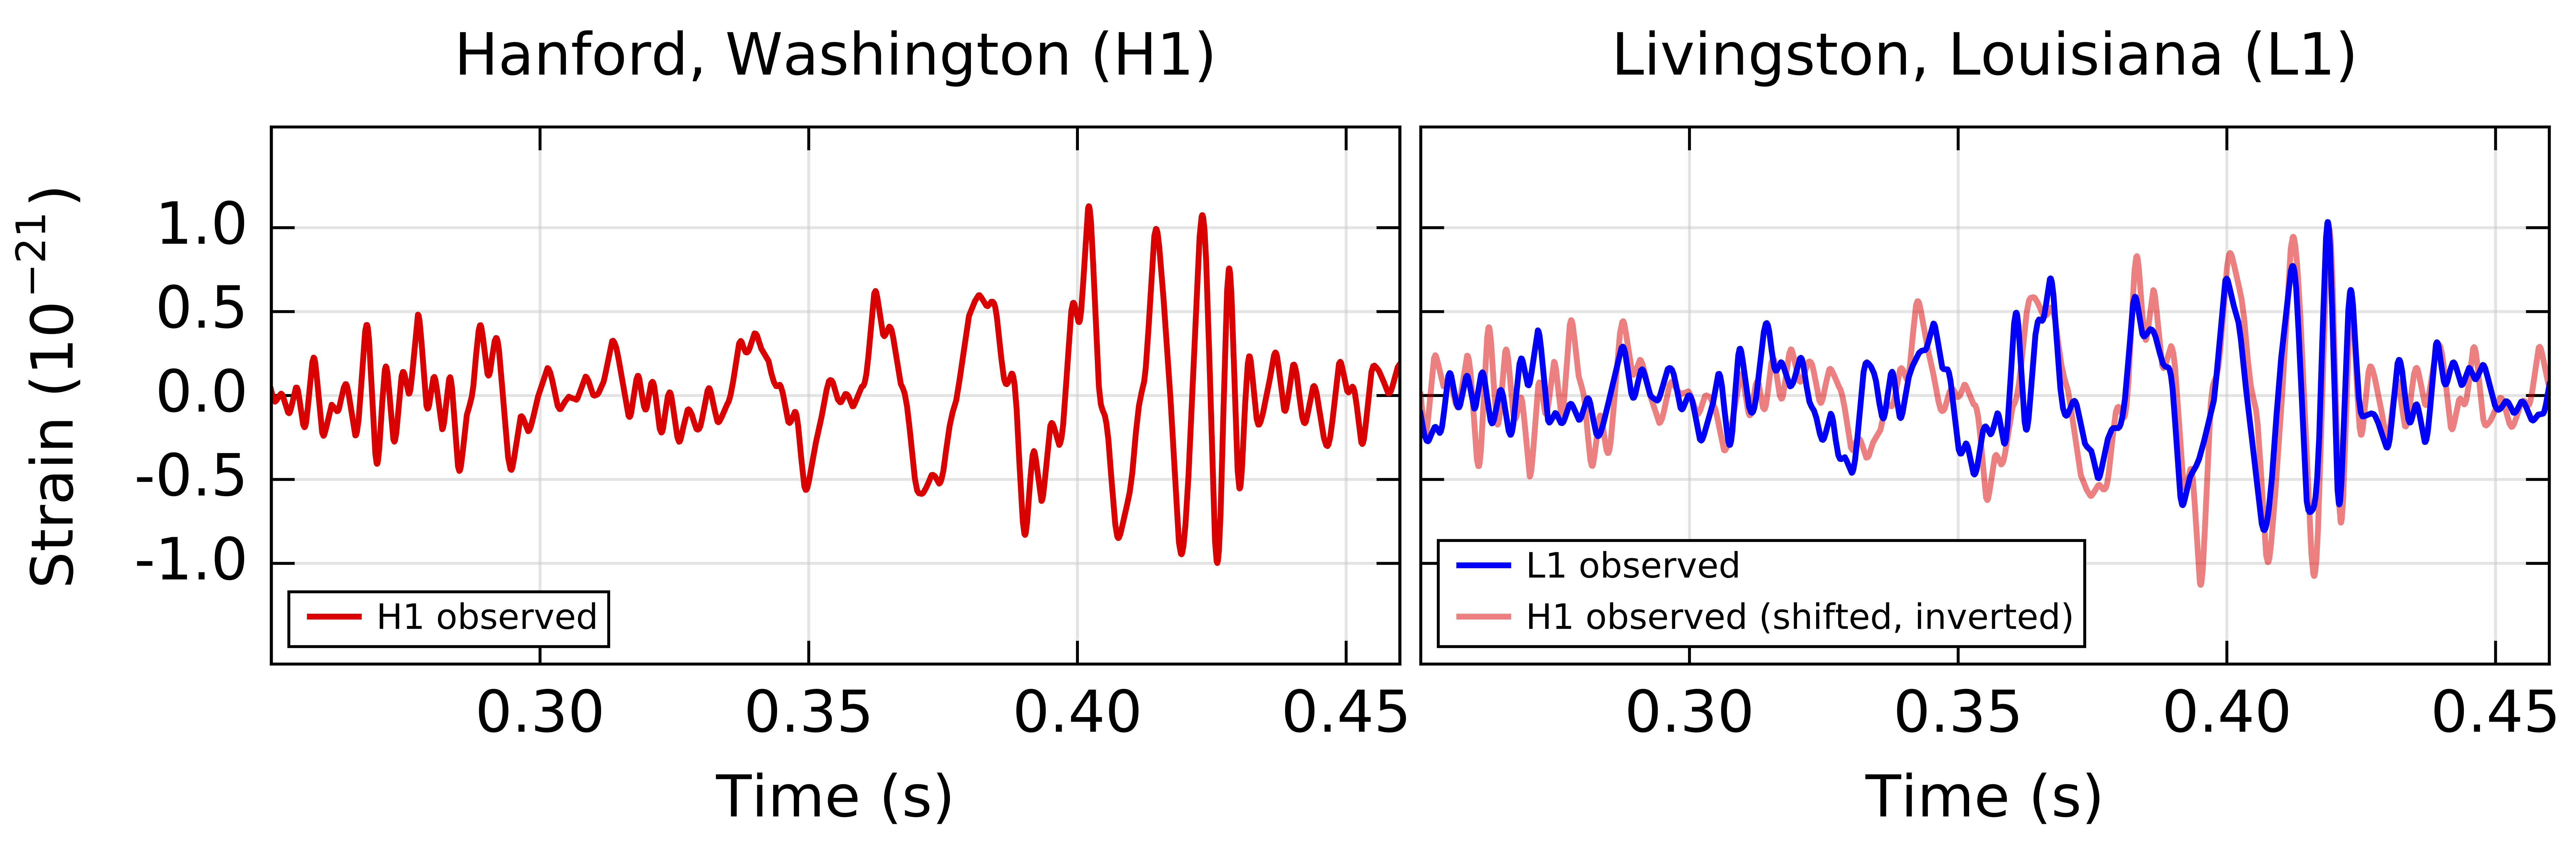

In [24]:
Image("ligo_signal2.png")